# Linear Regression Multivariate

## Sample problem of predicting home price in monroe, new jersey (USA)

Below is the table containing home prices in monroe twp, NJ. Here price depends on area (square feet), bed rooms and age of the home (in years). Given these prices we have to predict prices of new homes based on area, bed rooms and age.

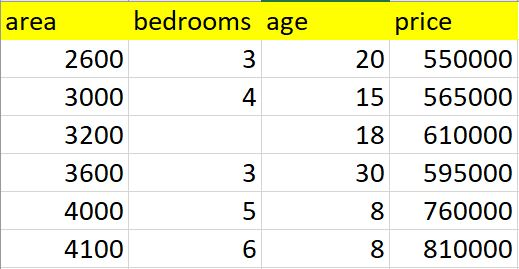

Given these home prices find out price of a home that has,

3000 sqr ft area, 3 bedrooms, 40 year old

2500 sqr ft area, 4 bedrooms, 5 year old



We will use regression with multiple variables here. Price can be calculated using following equation,


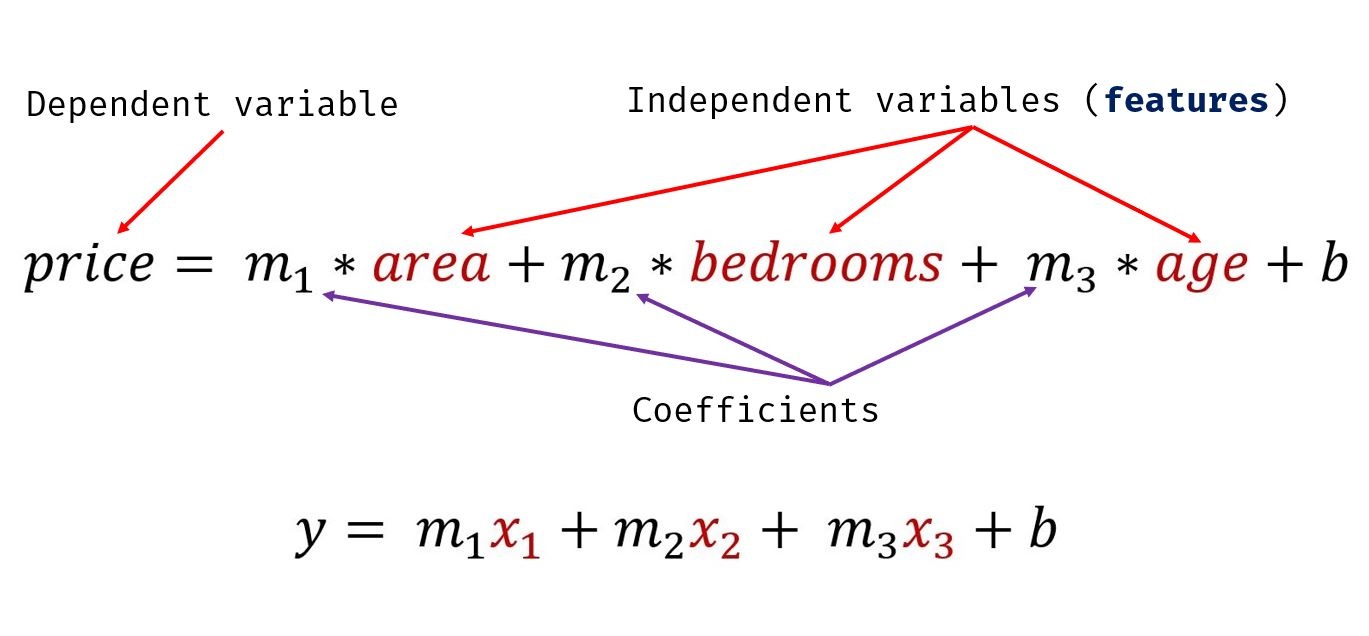
Here area, bedrooms, age are called independant variables or features whereas price is a dependant variable


In [69]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [70]:
df=pd.read_csv(r'Z:\AA_SEM9\ML\Linear Regression Multivariate\Dataset\homeprices.csv')

In [71]:
df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

Data Preprocessing: Fill NA values with median value of a column

In [72]:
df['bedrooms'].median()

4.0

In [73]:
df['bedrooms']=df['bedrooms'].fillna(df['bedrooms'].median())
df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

In [74]:
new_df=df.drop('price',axis='columns')
new_df

area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       4.0   18
3  3600       3.0   30
4  4000       5.0    8
5  4100       6.0    8

In [75]:
price=df['price']
price

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [76]:
model=linear_model.LinearRegression()
model.fit(new_df,price)

LinearRegression()

Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

In [77]:
model.predict([[3000, 3, 40]])

C:\Users\19pw03\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

Testing

In [78]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [79]:
model.intercept_

221323.0018654043

In [80]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386



Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old


In [81]:
model.predict([[2500, 4, 5]])

C:\Users\19pw03\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])


Exercise

In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score


In [82]:
df=pd.read_csv('Z:\AA_SEM9\ML\Linear Regression Multivariate\Dataset\hiring.csv')
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000

In [83]:
df['experience']=df['experience'].fillna('zero')
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0       zero                    8.0                           9      50000
1       zero                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000

In [84]:
df['experience']=df['experience'].apply(w2n.word_to_num)
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    NaN                           7      72000
7          11                    7.0                           8      80000

In [85]:
mean_test_score=df['test_score(out of 10)'].mean()
mean_test_score

7.857142857142857

In [86]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(mean_test_score)
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0               8.000000                           9      50000
1           0               8.000000                           6      45000
2           5               6.000000                           7      60000
3           2              10.000000                          10      65000
4           7               9.000000                           6      70000
5           3               7.000000                          10      62000
6          10               7.857143                           7      72000
7          11               7.000000                           8      80000

In [87]:
df_features=df.drop('salary($)',axis='columns')
df_features

experience  test_score(out of 10)  interview_score(out of 10)
0           0               8.000000                           9
1           0               8.000000                           6
2           5               6.000000                           7
3           2              10.000000                          10
4           7               9.000000                           6
5           3               7.000000                          10
6          10               7.857143                           7
7          11               7.000000                           8

In [88]:
target=df['salary($)']
target

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [89]:
model=linear_model.LinearRegression()
model.fit(df_features,target)

LinearRegression()

2 yr experience, 9 test score, 6 interview score



In [90]:
model.predict([[2,9,6]])

C:\Users\19pw03\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53290.89255945])

12 yr experience, 10 test score, 10 interview score

In [91]:

model.predict([[12,10,10]])

C:\Users\19pw03\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])